# PYTHON 資料科學期末專題 (二)

[提示]

用Pandas讀入時有時需要注意encoding參數

1.1 引入 Pandas Profiling

1.2 需要注意異常值與缺失值的處理, 注意資料區間, 評估值區間差異過大的問題

1.3 資料的分類, 以期可以分別繪製比對圖形; 

[基本目標]

把 Netflix 的資訊分門別列出來


[進階目標]

畫出Heatmap 與 文字雲(找出最多人看的影片)

# 參考範例

同學可以參照範例執行, 有問題隨時提問

In [76]:
!pip install pandas_profiling

You should consider upgrading via the 'C:\Users\Administrator\anaconda\envs\vnpy_venv\python.exe -m pip install --upgrade pip' command.


In [76]:
# 載入繪圖相關套件
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
%matplotlib inline    # 魔法函数
import seaborn as sns

UsageError: unrecognized arguments: # 魔法函数


In [77]:
# 載入資料處理相關套件
from pandas_profiling import ProfileReport
import numpy as np 
import pandas as pd 

In [4]:
#載入資料集
df = pd.read_csv('C:/Users/Administrator/Desktop/Python資料科學程式馬拉松/6.期末/Covid vs netflix/netflix_titles.csv')

#檢視資料的項目
df.head()

show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                   director  \
0  Richard Finn, Tim Maltby   
1                       NaN   
2                       NaN   
3                       NaN   
4          Fernando Lebrija   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Montano, Frank Welker, J...   
3  Will Friedle, Darren Criss, Constance Zimmer, ...   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   

                                    country         date_added  release_year  \
0  United States, India, South Korea, China  September 9, 2019          2019   
1                            United Kingdom  September 9, 2016          2016   
2                             United States  September 8, 2018          2013   
3                             United States  September 8, 2018          2016   
4                             United States  September 8, 2017          2017   

     rating  duration                           listed_in  \
0     TV-PG    90 min  Children & Family Movies, Comedies   
1     TV-MA    94 min                     Stand-Up Comedy   
2  TV-Y7-FV  1 Season                            Kids' TV   
3     TV-Y7  1 Season                            Kids' TV   
4     TV-14    99 min                            Comedies   

                                         description  
0  Before planning an awesome wedding for his gra...  
1  Jandino Asporaat riffs on the challenges of ra...  
2  With the help of three human allies, the Autob...  
3  When a prison ship crash unleashes hundreds of...  
4  When nerdy high schooler Dani finally attracts...

In [5]:
# 查看資料集型態

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


# 導入pandas-profiling

import pandas_profiling

生成的數據報告

data是需要生成報告的數據，DataFrame型別

pandas_profiling.ProfileReport(data)

導出報告

pfr = pandas_profiling.ProfileReport(data)
pfr.to_file('report.html')

In [6]:
# 生成資料集的報告，可以用來檢核可視化結果是否正確

profile = pandas_profiling.ProfileReport(df)
profile.to_file('output2.html')
# profile.to_widgets()
profile.to_notebook_iframe()

NameError: name 'pandas_profiling' is not defined

In [7]:
#生成資料集的報告, 可以用來檢核可視化結果是否正確
report = ProfileReport(df)

In [8]:
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# 資料清洗

先確認缺失值狀況

In [9]:
## .nunique()用來獲取唯一值的統計次數
# 功能：計算axis=0上的不同觀察結果, 主要是 Non NA
df.nunique()

show_id         6234
type               2
title           6172
director        3301
cast            5469
country          554
date_added      1524
release_year      72
rating            14
duration         201
listed_in        461
description     6226
dtype: int64

In [10]:
## 查看有無缺失值
print(df.isnull().any())

#計算缺失值
df.isna().sum()

show_id         False
type            False
title           False
director         True
cast             True
country          True
date_added       True
release_year    False
rating           True
duration        False
listed_in       False
description     False
dtype: bool


show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

### 修正 "rating" 這個欄位上的缺失狀況

In [11]:
# 計算唯一值有幾個
# 列出唯一值
df['rating'].unique()

array(['TV-PG', 'TV-MA', 'TV-Y7-FV', 'TV-Y7', 'TV-14', 'R', 'TV-Y', 'NR',
       'PG-13', 'TV-G', 'PG', 'G', nan, 'UR', 'NC-17'], dtype=object)

In [12]:
# 過濾出數據中'rating'為Nan的數據

df[df['rating'].isna()]

show_id     type                                              title  \
211   70129452    Movie                              Louis C.K.: Hilarious   
2411  80144119    Movie                               My Honor Was Loyalty   
3288  80169801    Movie  13TH: A Conversation with Oprah Winfrey & Ava ...   
4056  80078037  TV Show                                       Little Lunch   
4402  80092839    Movie  Fireplace 4K: Classic Crackling Fireplace from...   
4403  80092835    Movie  Fireplace 4K: Crackling Birchwood from Firepla...   
4706  80039789  TV Show                  Gargantia on the Verdurous Planet   
5015  80114111    Movie               Louis C.K.: Live at the Comedy Store   
5234  80161109    Movie                                    Louis C.K. 2017   
6231  80116008    Movie             Little Baby Bum: Nursery Rhyme Friends   

             director                                               cast  \
211        Louis C.K.                                         Louis C.K.   
2411  Alessandro Pepe  Leone Frisa, Paolo Vaccarino, Francesco Miglio...   
3288              NaN                        Oprah Winfrey, Ava DuVernay   
4056              NaN  Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...   
4402      George Ford                                                NaN   
4403      George Ford                                                NaN   
4706              NaN  Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...   
5015       Louis C.K.                                         Louis C.K.   
5234       Louis C.K.                                         Louis C.K.   
6231              NaN                                                NaN   

            country          date_added  release_year rating  duration  \
211   United States  September 16, 2016          2010    NaN    84 min   
2411          Italy       March 1, 2017          2015    NaN   115 min   
3288            NaN    January 26, 2017          2017    NaN    37 min   
4056      Australia    February 1, 2018          2015    NaN  1 Season   
4402            NaN   December 21, 2015          2015    NaN    60 min   
4403            NaN   December 21, 2015          2015    NaN    60 min   
4706          Japan    December 1, 2016          2013    NaN  1 Season   
5015  United States     August 15, 2016          2015    NaN    66 min   
5234  United States       April 4, 2017          2017    NaN    74 min   
6231            NaN                 NaN          2016    NaN    60 min   

                                 listed_in  \
211                                 Movies   
2411                                Dramas   
3288                                Movies   
4056                 Kids' TV, TV Comedies   
4402                                Movies   
4403                                Movies   
4706  Anime Series, International TV Shows   
5015                                Movies   
5234                                Movies   
6231                                Movies   

                                            description  
211   Emmy-winning comedy writer Louis C.K. brings h...  
2411  Amid the chaos and horror of World War II, a c...  
3288  Oprah Winfrey sits down with director Ava DuVe...  
4056  Adopting a child's perspective, this show take...  
4402  The first of its kind in UHD 4K, with the clea...  
4403  For the first time in 4K Ultra-HD, everyone's ...  
4706  After falling through a wormhole, a space-dwel...  
5015  The comic puts his trademark hilarious/thought...  
5234  Louis C.K. muses on religion, eternal love, gi...  
6231  Nursery rhymes and original music for children...

# 基於 Netflix shows,我們可以嘗試使用 replacements

In [13]:
# 將上面過濾出在'rating'上有缺失值的數據填補
# id對應填補的'rating'

# 設定 id：'填補值'
rating_replacements = {
    211: 'TV-14',
    2411: 'TV-14',
    3288: 'PG-13',
    4056: 'TV-G',
    4402: 'TV-G',
    4403: 'TV-G',
    4706: 'TV-14',
    5015: 'TV-14',
    5234: 'TV-14',
    6231: 'TV-Y'
}

# 將Nan那一欄依照上述 id：'填補值'用迴圈替代
for id, rate in rating_replacements.items():
    df.iloc[id, 8] = rate

# 檢查有無缺失值
print(df['rating'].isna().sum()) # 缺失值數量
df['rating'].isna().any()        # 判斷有無缺失值

0


False

### 為了簡單處理, 先行丟棄director 跟 cast

cast: 太多異常值, 因為太多演員

In [14]:
# 丟棄director 跟 cast 欄
df = df.drop(['director', 'cast'], axis=1)

df.columns

Index(['show_id', 'type', 'title', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [15]:
df.head()

show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                                    country         date_added  release_year  \
0  United States, India, South Korea, China  September 9, 2019          2019   
1                            United Kingdom  September 9, 2016          2016   
2                             United States  September 8, 2018          2013   
3                             United States  September 8, 2018          2016   
4                             United States  September 8, 2017          2017   

     rating  duration                           listed_in  \
0     TV-PG    90 min  Children & Family Movies, Comedies   
1     TV-MA    94 min                     Stand-Up Comedy   
2  TV-Y7-FV  1 Season                            Kids' TV   
3     TV-Y7  1 Season                            Kids' TV   
4     TV-14    99 min                            Comedies   

                                         description  
0  Before planning an awesome wedding for his gra...  
1  Jandino Asporaat riffs on the challenges of ra...  
2  With the help of three human allies, the Autob...  
3  When a prison ship crash unleashes hundreds of...  
4  When nerdy high schooler Dani finally attracts...

### 修正date_added 缺失狀況 

In [16]:
# 過濾出'date_added'為NaN的數據
df[df['date_added'].isna()]

show_id     type                                        title  \
6223  70204989  TV Show                              Gunslinger Girl   
6224  70304979  TV Show              Anthony Bourdain: Parts Unknown   
6225  70153412  TV Show                                      Frasier   
6226  70243132  TV Show                          La Familia P. Luche   
6227  80005756  TV Show                 The Adventures of Figaro Pho   
6228  80159925  TV Show                                     Kikoriki   
6229  80000063  TV Show                                 Red vs. Blue   
6230  70286564  TV Show                                        Maron   
6231  80116008    Movie       Little Baby Bum: Nursery Rhyme Friends   
6232  70281022  TV Show  A Young Doctor's Notebook and Other Stories   
6233  70153404  TV Show                                      Friends   

             country date_added  release_year rating    duration  \
6223           Japan        NaN          2008  TV-14   2 Seasons   
6224   United States        NaN          2018  TV-PG   5 Seasons   
6225   United States        NaN          2003  TV-PG  11 Seasons   
6226   United States        NaN          2012  TV-14   3 Seasons   
6227       Australia        NaN          2015  TV-Y7   2 Seasons   
6228             NaN        NaN          2010   TV-Y   2 Seasons   
6229   United States        NaN          2015     NR  13 Seasons   
6230   United States        NaN          2016  TV-MA   4 Seasons   
6231             NaN        NaN          2016   TV-Y      60 min   
6232  United Kingdom        NaN          2013  TV-MA   2 Seasons   
6233   United States        NaN          2003  TV-14  10 Seasons   

                                              listed_in  \
6223                       Anime Series, Crime TV Shows   
6224                                         Docuseries   
6225                     Classic & Cult TV, TV Comedies   
6226  International TV Shows, Spanish-Language TV Sh...   
6227                              Kids' TV, TV Comedies   
6228                                           Kids' TV   
6229  TV Action & Adventure, TV Comedies, TV Sci-Fi ...   
6230                                        TV Comedies   
6231                                             Movies   
6232           British TV Shows, TV Comedies, TV Dramas   
6233                     Classic & Cult TV, TV Comedies   

                                            description  
6223  On the surface, the Social Welfare Agency appe...  
6224  This CNN original series has chef Anthony Bour...  
6225  Frasier Crane is a snooty but lovable Seattle ...  
6226  This irreverent sitcom featues Ludovico, Feder...  
6227  Imagine your worst fears, then multiply them: ...  
6228  A wacky rabbit and his gang of animal pals hav...  
6229  This parody of first-person shooter games, mil...  
6230  Marc Maron stars as Marc Maron, who interviews...  
6231  Nursery rhymes and original music for children...  
6232  Set during the Russian Revolution, this comic ...  
6233  This hit sitcom follows the merry misadventure...

I have search for them in the internet and is dificult to find the `date_added`to Netlix, so i will drop them, as they are only 11 rows

In [17]:
# 過濾出'date_added'不為NaN的數據
df = df[df['date_added'].notna()]
df

show_id     type                                    title  \
0     81145628    Movie  Norm of the North: King Sized Adventure   
1     80117401    Movie               Jandino: Whatever it Takes   
2     70234439  TV Show                       Transformers Prime   
3     80058654  TV Show         Transformers: Robots in Disguise   
4     80125979    Movie                             #realityhigh   
...        ...      ...                                      ...   
6218  80162994  TV Show                  Talking Tom and Friends   
6219  80186475  TV Show                       Pokémon the Series   
6220  70272742  TV Show                              Justin Time   
6221  80067942  TV Show  Terrace House: Boys & Girls in the City   
6222  70136122  TV Show                                    Weeds   

                                       country         date_added  \
0     United States, India, South Korea, China  September 9, 2019   
1                               United Kingdom  September 9, 2016   
2                                United States  September 8, 2018   
3                                United States  September 8, 2018   
4                                United States  September 8, 2017   
...                                        ...                ...   
6218                 Cyprus, Austria, Thailand     April 10, 2019   
6219                                     Japan      April 1, 2019   
6220                                    Canada      April 1, 2016   
6221                                     Japan      April 1, 2016   
6222                             United States      April 1, 2014   

      release_year    rating   duration                           listed_in  \
0             2019     TV-PG     90 min  Children & Family Movies, Comedies   
1             2016     TV-MA     94 min                     Stand-Up Comedy   
2             2013  TV-Y7-FV   1 Season                            Kids' TV   
3             2016     TV-Y7   1 Season                            Kids' TV   
4             2017     TV-14     99 min                            Comedies   
...            ...       ...        ...                                 ...   
6218          2017      TV-G  2 Seasons               Kids' TV, TV Comedies   
6219          2019  TV-Y7-FV  2 Seasons              Anime Series, Kids' TV   
6220          2012      TV-Y  2 Seasons                            Kids' TV   
6221          2016     TV-14  2 Seasons  International TV Shows, Reality TV   
6222          2012     TV-MA  8 Seasons              TV Comedies, TV Dramas   

                                            description  
0     Before planning an awesome wedding for his gra...  
1     Jandino Asporaat riffs on the challenges of ra...  
2     With the help of three human allies, the Autob...  
3     When a prison ship crash unleashes hundreds of...  
4     When nerdy high schooler Dani finally attracts...  
...                                                 ...  
6218  Full of funny one-liners and always ready for ...  
6219  Ash and his Pikachu travel to the Alola region...  
6220  In Justin's dreams, he and his imaginary frien...  
6221  A new set of six men and women start their liv...  
6222  A suburban mother starts selling marijuana to ...  

[6223 rows x 10 columns]

### 修正country 類別的狀況

In [18]:
# mode()出現最多的
print(df['country'].mode()[0])  # 出現最多次的國家

# 將['country']中的缺失值用['country']中出現最多次的國家名字來填補：United States
df['country'] = df['country'].fillna(df['country'].mode()[0])
df.head()

United States


show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                                    country         date_added  release_year  \
0  United States, India, South Korea, China  September 9, 2019          2019   
1                            United Kingdom  September 9, 2016          2016   
2                             United States  September 8, 2018          2013   
3                             United States  September 8, 2018          2016   
4                             United States  September 8, 2017          2017   

     rating  duration                           listed_in  \
0     TV-PG    90 min  Children & Family Movies, Comedies   
1     TV-MA    94 min                     Stand-Up Comedy   
2  TV-Y7-FV  1 Season                            Kids' TV   
3     TV-Y7  1 Season                            Kids' TV   
4     TV-14    99 min                            Comedies   

                                         description  
0  Before planning an awesome wedding for his gra...  
1  Jandino Asporaat riffs on the challenges of ra...  
2  With the help of three human allies, the Autob...  
3  When a prison ship crash unleashes hundreds of...  
4  When nerdy high schooler Dani finally attracts...

### 確認缺失值的處理是否完整

In [19]:
# 計算缺失值共有多少個
df.isna().sum()

# 判斷還有沒有缺失值
df.isna().any()

show_id         False
type            False
title           False
country         False
date_added      False
release_year    False
rating          False
duration        False
listed_in       False
description     False
dtype: bool

## 產生新的特徵

In [20]:
df.head()

show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                                    country         date_added  release_year  \
0  United States, India, South Korea, China  September 9, 2019          2019   
1                            United Kingdom  September 9, 2016          2016   
2                             United States  September 8, 2018          2013   
3                             United States  September 8, 2018          2016   
4                             United States  September 8, 2017          2017   

     rating  duration                           listed_in  \
0     TV-PG    90 min  Children & Family Movies, Comedies   
1     TV-MA    94 min                     Stand-Up Comedy   
2  TV-Y7-FV  1 Season                            Kids' TV   
3     TV-Y7  1 Season                            Kids' TV   
4     TV-14    99 min                            Comedies   

                                         description  
0  Before planning an awesome wedding for his gra...  
1  Jandino Asporaat riffs on the challenges of ra...  
2  With the help of three human allies, the Autob...  
3  When a prison ship crash unleashes hundreds of...  
4  When nerdy high schooler Dani finally attracts...

### 利用日期相加取得新的年月資料

我們將從date_add中獲取年份和月份，以便我們可以比較最有價值的月份在Show realse與Netflix我們新增日期的部分

In [21]:
df['date_added']

0       September 9, 2019
1       September 9, 2016
2       September 8, 2018
3       September 8, 2018
4       September 8, 2017
              ...        
6218       April 10, 2019
6219        April 1, 2019
6220        April 1, 2016
6221        April 1, 2016
6222        April 1, 2014
Name: date_added, Length: 6223, dtype: object

In [22]:
# 從'date_added'中萃取出年份，輸出 'year_added'欄位
# x.split(" ")[-1] -> 如將September 9, 2019 切開後取最後1個[-1]，也就是年分

df['year_added'] = df['date_added'].apply(lambda x: x.split(" ")[-1])
df['year_added'].head()

0    2019
1    2016
2    2018
3    2018
4    2017
Name: year_added, dtype: object

In [23]:
# 從'date_added'中萃取出年份，輸出 'month_added'欄位
# x.split(" ")[0] -> 如將September 9, 2019 切開後取第1個[0]，也就是月分

df['month_added'] = df['date_added'].apply(lambda x: x.split(" ")[0])
df['month_added'].head()

0    September
1    September
2    September
3    September
4    September
Name: month_added, dtype: object

In [24]:
df.head()

show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                                    country         date_added  release_year  \
0  United States, India, South Korea, China  September 9, 2019          2019   
1                            United Kingdom  September 9, 2016          2016   
2                             United States  September 8, 2018          2013   
3                             United States  September 8, 2018          2016   
4                             United States  September 8, 2017          2017   

     rating  duration                           listed_in  \
0     TV-PG    90 min  Children & Family Movies, Comedies   
1     TV-MA    94 min                     Stand-Up Comedy   
2  TV-Y7-FV  1 Season                            Kids' TV   
3     TV-Y7  1 Season                            Kids' TV   
4     TV-14    99 min                            Comedies   

                                         description year_added month_added  
0  Before planning an awesome wedding for his gra...       2019   September  
1  Jandino Asporaat riffs on the challenges of ra...       2016   September  
2  With the help of three human allies, the Autob...       2018   September  
3  When a prison ship crash unleashes hundreds of...       2018   September  
4  When nerdy high schooler Dani finally attracts...       2017   September

### 根據評分顯示目標

這可能很有趣，表明目標主要是productions

In [25]:
# 'rating' 名稱替換

ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

In [26]:
# 依照上述'rating'對應替換的名稱，輸出'target_ages'欄位

df['target_ages'] = df['rating'].replace(ratings_ages)

# 顯示'target_ages'中的唯一值
df['target_ages'].unique()
df['target_ages']

0       Older Kids
1           Adults
2       Older Kids
3       Older Kids
4            Teens
           ...    
6218          Kids
6219    Older Kids
6220          Kids
6221         Teens
6222        Adults
Name: target_ages, Length: 6223, dtype: object

In [27]:
df.head(3)

show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   

                                    country         date_added  release_year  \
0  United States, India, South Korea, China  September 9, 2019          2019   
1                            United Kingdom  September 9, 2016          2016   
2                             United States  September 8, 2018          2013   

     rating  duration                           listed_in  \
0     TV-PG    90 min  Children & Family Movies, Comedies   
1     TV-MA    94 min                     Stand-Up Comedy   
2  TV-Y7-FV  1 Season                            Kids' TV   

                                         description year_added month_added  \
0  Before planning an awesome wedding for his gra...       2019   September   
1  Jandino Asporaat riffs on the challenges of ra...       2016   September   
2  With the help of three human allies, the Autob...       2018   September   

  target_ages  
0  Older Kids  
1      Adults  
2  Older Kids

### Country 

在某些條目中，國家具有多個值。所以將在第一列中添加一個新列，以便我們檢查witch區域是否有更多作品

In [28]:
df['country']

0       United States, India, South Korea, China
1                                 United Kingdom
2                                  United States
3                                  United States
4                                  United States
                          ...                   
6218                   Cyprus, Austria, Thailand
6219                                       Japan
6220                                      Canada
6221                                       Japan
6222                               United States
Name: country, Length: 6223, dtype: object

In [29]:
# 有些數據的'country'有多個值，例如..
print(df['country'][0])

# 保留第一個國家的值就好，輸出'principal_country'欄位
# x.split(" ")[0] -> 如將United States, India, South Korea, China切開後取第1個[0]
df['principal_country'] = df['country'].apply(lambda x: x.split(",")[0])
df['principal_country'].head()

United States, India, South Korea, China


0     United States
1    United Kingdom
2     United States
3     United States
4     United States
Name: principal_country, dtype: object

## 修正日期型別

In [30]:
# 目前日期型別
df.dtypes

show_id               int64
type                 object
title                object
country              object
date_added           object
release_year          int64
rating               object
duration             object
listed_in            object
description          object
year_added           object
month_added          object
target_ages          object
principal_country    object
dtype: object

In [31]:
# type should be a category 轉換成category
df['type'] = pd.Categorical(df['type'])

# 轉換成category，然後有4種種類(4 classes)
df['target_ages'] = pd.Categorical(df['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

# Year added 轉換成數值型資料int
df['year_added'] = pd.to_numeric(df['year_added'])

In [32]:
df.dtypes

show_id                 int64
type                 category
title                  object
country                object
date_added             object
release_year            int64
rating                 object
duration               object
listed_in              object
description            object
year_added              int64
month_added            object
target_ages          category
principal_country      object
dtype: object

# 資料視覺化

In [33]:
df.head()

show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                                    country         date_added  release_year  \
0  United States, India, South Korea, China  September 9, 2019          2019   
1                            United Kingdom  September 9, 2016          2016   
2                             United States  September 8, 2018          2013   
3                             United States  September 8, 2018          2016   
4                             United States  September 8, 2017          2017   

     rating  duration                           listed_in  \
0     TV-PG    90 min  Children & Family Movies, Comedies   
1     TV-MA    94 min                     Stand-Up Comedy   
2  TV-Y7-FV  1 Season                            Kids' TV   
3     TV-Y7  1 Season                            Kids' TV   
4     TV-14    99 min                            Comedies   

                                         description  year_added month_added  \
0  Before planning an awesome wedding for his gra...        2019   September   
1  Jandino Asporaat riffs on the challenges of ra...        2016   September   
2  With the help of three human allies, the Autob...        2018   September   
3  When a prison ship crash unleashes hundreds of...        2018   September   
4  When nerdy high schooler Dani finally attracts...        2017   September   

  target_ages principal_country  
0  Older Kids     United States  
1      Adults    United Kingdom  
2  Older Kids     United States  
3  Older Kids     United States  
4       Teens     United States

In [207]:
print(df['listed_in'])

# 取代'listed_in'原有值，然後分割，輸出'genre'此欄位
df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 
df['genre'].head()

0       Children & Family Movies, Comedies
1                          Stand-Up Comedy
2                                 Kids' TV
3                                 Kids' TV
4                                 Comedies
                       ...                
6218                 Kids' TV, TV Comedies
6219                Anime Series, Kids' TV
6220                              Kids' TV
6221    International TV Shows, Reality TV
6222                TV Comedies, TV Dramas
Name: listed_in, Length: 6223, dtype: object


0    [Children & Family Movies, Comedies]
1                       [Stand-Up Comedy]
2                              [Kids' TV]
3                              [Kids' TV]
4                              [Comedies]
Name: genre, dtype: object

In [34]:
# 過濾出'type'='Movie'和'TV Show'的數據

movie_df = df[df['type'] == 'Movie']  # 過濾後放入movie_df
show_df = df[df['type'] == 'TV Show'] # 過濾後放入TV Show_df

print(movie_df.head(1))
show_df.head(1)

    show_id   type                                    title  \
0  81145628  Movie  Norm of the North: King Sized Adventure   

                                    country         date_added  release_year  \
0  United States, India, South Korea, China  September 9, 2019          2019   

  rating duration                           listed_in  \
0  TV-PG   90 min  Children & Family Movies, Comedies   

                                         description  year_added month_added  \
0  Before planning an awesome wedding for his gra...        2019   September   

  target_ages principal_country  
0  Older Kids     United States  


show_id     type               title        country         date_added  \
2  70234439  TV Show  Transformers Prime  United States  September 8, 2018   

   release_year    rating  duration listed_in  \
2          2013  TV-Y7-FV  1 Season  Kids' TV   

                                         description  year_added month_added  \
2  With the help of three human allies, the Autob...        2018   September   

  target_ages principal_country  
2  Older Kids     United States

# TV shows 跟 Movies的比例

In [35]:
# value_counts()計算數量
# .reset_index() 排序

df['type'].value_counts().reset_index()

index  type
0    Movie  4264
1  TV Show  1959

In [36]:
# 畫圓餅圖

# 
fig = px.pie(df['type'].value_counts().reset_index(), values='type', names='index')

# 更新餅圖配置. textinfo -> 圖中顯示的資訊 . textposition -> 顯示位置
fig.update_traces(textposition='inside', textinfo='percent+label')

fig.update_layout(
    title = 'TV Show vs Movie',
    template = 'plotly_white'
)

fig.show()

In [37]:
# 新增rating 的資料子集
# 方便做年齡層的分布查詢

# 定義獲取函數
def generate_rating_df(df):
    # 以'rating', 'target_ages'分組，並使用聚合函數.agg來count計算'show_id'的次數
    # 其實就是計算這樣的'rating'和'target_ages'組合有多少個
    rating_df = df.groupby(['rating', 'target_ages']).agg({'show_id': 'count'}).reset_index()
    # 過濾出'show_id'不等於0的數據，等於0表示根本沒有這樣組合的數據
    rating_df = rating_df[rating_df['show_id'] != 0]
    rating_df.columns = ['rating', 'target_ages', 'counts'] # 設定欄位名稱
    rating_df = rating_df.sort_values('target_ages') # 根據'target_ages'年齡排序
    return rating_df

In [40]:
# 年齡層的分布
rating_df = generate_rating_df(df)
rating_df 

rating target_ages  counts
0          G        Kids      37
28      TV-G        Kids     152
40      TV-Y        Kids     142
13        PG  Older Kids     184
37     TV-PG  Older Kids     699
45     TV-Y7  Older Kids     168
49  TV-Y7-FV  Older Kids      95
18     PG-13       Teens     287
26     TV-14       Teens    1700
7      NC-17      Adults       2
11        NR      Adults     217
23         R      Adults     508
35     TV-MA      Adults    2025
55        UR      Adults       7

In [41]:

rating_df = generate_rating_df(df)

# 畫長條圖
fig = px.bar(rating_df, x='rating', y='counts', color='target_ages')
fig.show()

In [52]:
generate_rating_df(movie_df)

rating target_ages  counts
0          G        Kids      36
28      TV-G        Kids      82
40      TV-Y        Kids      41
13        PG  Older Kids     183
37     TV-PG  Older Kids     432
45     TV-Y7  Older Kids      69
49  TV-Y7-FV  Older Kids      27
18     PG-13       Teens     287
26     TV-14       Teens    1042
7      NC-17      Adults       2
11        NR      Adults     202
23         R      Adults     506
35     TV-MA      Adults    1348
55        UR      Adults       7

In [51]:
#針對影集或是歌劇

# 分別獲取'movie_df' 影集和'show_df'電視劇的組合數據
movie_rating_df = generate_rating_df(movie_df)
show_rating_df = generate_rating_df(show_df)

# 
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

# 畫圓餅圖
fig.add_trace(
    go.Pie(labels=movie_rating_df['target_ages'], values=movie_rating_df['counts']),
    row=1, col=1
)

fig.add_trace(
    go.Pie(labels=show_rating_df['target_ages'], values=show_rating_df['counts']),
    row=1, col=2
)

# 設定圓餅圖內文字位置 及 顯示方式
fig.update_traces(textposition='inside', hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Rating distribution by Type of content",
    # Add annotations in the center of the donut pies.
     annotations=[dict(text='Movies', x=0.16, y=0.5, font_size=12, showarrow=False),
                  dict(text='TV Shows', x=0.82, y=0.5, font_size=12, showarrow=False)])
fig.show()

In [54]:
country_df = df['principal_country'].value_counts().reset_index()
country_df

index  principal_country
0        United States               2770
1                India                808
2       United Kingdom                482
3               Canada                206
4                Japan                183
..                 ...                ...
67  Dominican Republic                  1
68             Somalia                  1
69           Guatemala                  1
70                Iran                  1
71              Cyprus                  1

[72 rows x 2 columns]

In [60]:
# 判斷出現比率是否超過總數據1%的國家數據
country_df['principal_country'] /  country_df['principal_country'].sum() > 0.01

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
Name: principal_country, dtype: bool

In [62]:
#按國別分別顯示影集與歌劇的產出分布,使用圓餅圖
print(df['principal_country'].value_counts())

# 計算 
country_df = df['principal_country'].value_counts().reset_index()

# 過濾出出現比率超過總數據1%的國家數據
country_df = country_df[country_df['principal_country'] /  country_df['principal_country'].sum() > 0.01]
print(country_df)

fig = px.pie(country_df, values='principal_country', names='index')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

United States         2770
India                  808
United Kingdom         482
Canada                 206
Japan                  183
                      ... 
Dominican Republic       1
Somalia                  1
Guatemala                1
Iran                     1
Cyprus                   1
Name: principal_country, Length: 72, dtype: int64
             index  principal_country
0    United States               2770
1            India                808
2   United Kingdom                482
3           Canada                206
4            Japan                183
5           France                147
6      South Korea                146
7            Spain                139
8           Mexico                 99
9        Australia                 93
10          Turkey                 83
11           China                 77
12       Hong Kong                 73
13          Taiwan                 71
14         Germany                 65


In [63]:
#按國別分別顯示影集與歌劇的產出分布,使用歷史分布
fig = px.histogram(df, x='principal_country')

fig.update_xaxes(categoryorder='total descending')
fig.show()

## 發佈內容
我們可以看到，在過去的幾年中，內容製作的數量在增加

In [68]:
# 'release_year'大於2010的資料
df.loc[df['release_year'] > 2010]

show_id     type                                    title  \
0     81145628    Movie  Norm of the North: King Sized Adventure   
1     80117401    Movie               Jandino: Whatever it Takes   
2     70234439  TV Show                       Transformers Prime   
3     80058654  TV Show         Transformers: Robots in Disguise   
4     80125979    Movie                             #realityhigh   
...        ...      ...                                      ...   
6218  80162994  TV Show                  Talking Tom and Friends   
6219  80186475  TV Show                       Pokémon the Series   
6220  70272742  TV Show                              Justin Time   
6221  80067942  TV Show  Terrace House: Boys & Girls in the City   
6222  70136122  TV Show                                    Weeds   

                                       country         date_added  \
0     United States, India, South Korea, China  September 9, 2019   
1                               United Kingdom  September 9, 2016   
2                                United States  September 8, 2018   
3                                United States  September 8, 2018   
4                                United States  September 8, 2017   
...                                        ...                ...   
6218                 Cyprus, Austria, Thailand     April 10, 2019   
6219                                     Japan      April 1, 2019   
6220                                    Canada      April 1, 2016   
6221                                     Japan      April 1, 2016   
6222                             United States      April 1, 2014   

      release_year    rating   duration                           listed_in  \
0             2019     TV-PG     90 min  Children & Family Movies, Comedies   
1             2016     TV-MA     94 min                     Stand-Up Comedy   
2             2013  TV-Y7-FV   1 Season                            Kids' TV   
3             2016     TV-Y7   1 Season                            Kids' TV   
4             2017     TV-14     99 min                            Comedies   
...            ...       ...        ...                                 ...   
6218          2017      TV-G  2 Seasons               Kids' TV, TV Comedies   
6219          2019  TV-Y7-FV  2 Seasons              Anime Series, Kids' TV   
6220          2012      TV-Y  2 Seasons                            Kids' TV   
6221          2016     TV-14  2 Seasons  International TV Shows, Reality TV   
6222          2012     TV-MA  8 Seasons              TV Comedies, TV Dramas   

                                            description  year_added  \
0     Before planning an awesome wedding for his gra...        2019   
1     Jandino Asporaat riffs on the challenges of ra...        2016   
2     With the help of three human allies, the Autob...        2018   
3     When a prison ship crash unleashes hundreds of...        2018   
4     When nerdy high schooler Dani finally attracts...        2017   
...                                                 ...         ...   
6218  Full of funny one-liners and always ready for ...        2019   
6219  Ash and his Pikachu travel to the Alola region...        2019   
6220  In Justin's dreams, he and his imaginary frien...        2016   
6221  A new set of six men and women start their liv...        2016   
6222  A suburban mother starts selling marijuana to ...        2014   

     month_added target_ages principal_country  
0      September  Older Kids     United States  
1      September      Adults    United Kingdom  
2      September  Older Kids     United States  
3      September  Older Kids     United States  
4      September       Teens     United States  
...          ...         ...               ...  
6218                    Kids            Cyprus  
6219              Older Kids             Japan  
6220                    Kids            Canada  
6221                   Teens             Japan  
6222                

In [69]:
# 找出'release_year'大於2010年的數據，然後依['release_year', 'type']分組，透過.agg函數計算不同組合的次數
released_year_df = df.loc[df['release_year'] > 2010].groupby(['release_year', 'type']).agg({'show_id': 'count'}).reset_index()

# 找出'year_added'大於2010年的數據，然後依['year_added', 'type']分組，透過.agg函數計算不同組合的次數
added_year_df = df.loc[df['year_added'] > 2010].groupby(['year_added', 'type']).agg({'show_id': 'count'}).reset_index()

print(released_year_df.head())
print(added_year_df.head())

   release_year     type  show_id
0          2011    Movie      100
1          2011  TV Show       36
2          2012    Movie      125
3          2012  TV Show       57
4          2013    Movie      177
   year_added     type  show_id
0        2011    Movie       13
1        2011  TV Show        0
2        2012    Movie        4
3        2012  TV Show        3
4        2013    Movie        6


In [70]:
fig = go.Figure()

# 畫散點圖
# x軸 = 輸出released_year_df 中'type'是'Movie'的'release_year' (年)
# y軸 = 輸出released_year_df 中'type'是'Movie'的'show_id' (次數)
fig.add_trace(go.Scatter( 
    x=released_year_df.loc[released_year_df['type'] == 'Movie']['release_year'], 
    y=released_year_df.loc[released_year_df['type'] == 'Movie']['show_id'],
    mode='lines+markers',    # 折線圖+圓點圖
    name='Movie: Released Year',
    marker_color='green',
))

# 畫散點圖
# x軸 = 輸出released_year_df 中'type'是'TV Show'的'release_year' (年)
# y軸 = 輸出released_year_df 中'type'是'TV Show'的'show_id' (次數)
fig.add_trace(go.Scatter( 
    x=released_year_df.loc[released_year_df['type'] == 'TV Show']['release_year'], 
    y=released_year_df.loc[released_year_df['type'] == 'TV Show']['show_id'],
    mode='lines+markers',
    name='TV Show: Released Year',
    marker_color='darkgreen',
))

# 畫散點圖
# x軸 = 輸出added_year_df 中'type'是'Movie'的'year_added' (年)
# y軸 = 輸出added_year_df 中'type'是'Movie'的'show_id' (次數)
fig.add_trace(go.Scatter( 
    x=added_year_df.loc[added_year_df['type'] == 'Movie']['year_added'], 
    y=added_year_df.loc[added_year_df['type'] == 'Movie']['show_id'],
    mode='lines+markers',
    name='Movie: Year Added',
    marker_color='orange',
))

# 畫散點圖
# x軸 = 輸出added_year_df 中'type'是'TV Show'的'year_added' (年)
# y軸 = 輸出added_year_df 中'type'是'TV Show'的'show_id' (次數)
fig.add_trace(go.Scatter( 
    x=added_year_df.loc[added_year_df['type'] == 'TV Show']['year_added'], 
    y=added_year_df.loc[added_year_df['type'] == 'TV Show']['show_id'],
    mode='lines+markers',
    name='TV Show: Year Added',
    marker_color='darkorange',
))

fig.update_xaxes(categoryorder='total descending')
fig.show()

In [73]:
df.loc[df['release_year'] > 2000, 'release_year']

0       2019
1       2016
2       2013
3       2016
4       2017
        ... 
6218    2017
6219    2019
6220    2012
6221    2016
6222    2012
Name: release_year, Length: 5813, dtype: int64

In [82]:
# 正常連續隨機變量
import seaborn as sns
from scipy.stats import norm

# 找出'release_year' > 2000年的數據，然後輸出其'release_year' 
sns.distplot(df.loc[df['release_year'] > 2000, 'release_year'], fit=norm, kde=False)

#displot()集合了matplotlib的hist()與核函數估計kdeplot的功能，
#增加了rugplot分佈觀測條顯示與利用scipy庫fit擬合參數分佈的新穎用途。
#fit：控制擬合的參數分佈圖形，能夠直觀地評估它與觀察數據的對應關係(黑色線條為確定的分佈)

C:\Users\Administrator\anaconda\envs\vnpy_venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='release_year'>

## 建立內容類型的數據框

In [83]:
#導入SKLEARN的前處理套件, 將元素進行二元變換 , 輸入的資料會轉換成一個 一維 classes_
#每組資料會轉換成和 classes_ 相同大小的一維陣列
#如果資料有對應到 classes_  就為 1 否則為 0

from sklearn.preprocessing import MultiLabelBinarizer 

In [ ]:
def calculate_mlb(series):
    mlb = MultiLabelBinarizer()
    mlb_df = pd.DataFrame(mlb.fit_transform(series), columns=mlb.classes_, index=series.index)
    return mlb_df

In [ ]:
#如何在csv文件中將一列拆分為單獨的列
def top_genres(df, title='Top ones'):
    genres_df = calculate_mlb(df['genre'])
    tdata = genres_df.sum().sort_values(ascending=False)
    
    fig = go.Figure()
    fig.add_trace(go.Bar(
        x=tdata.index,
        y=tdata.values,
    ))
    fig.update_xaxes(categoryorder='total descending')
    fig.update_layout(title=title)
    fig.show()

In [ ]:
top_genres(movie_df, title='Top Movies Genres')

In [ ]:
top_genres(show_df, title='Top TV Shows Genres')

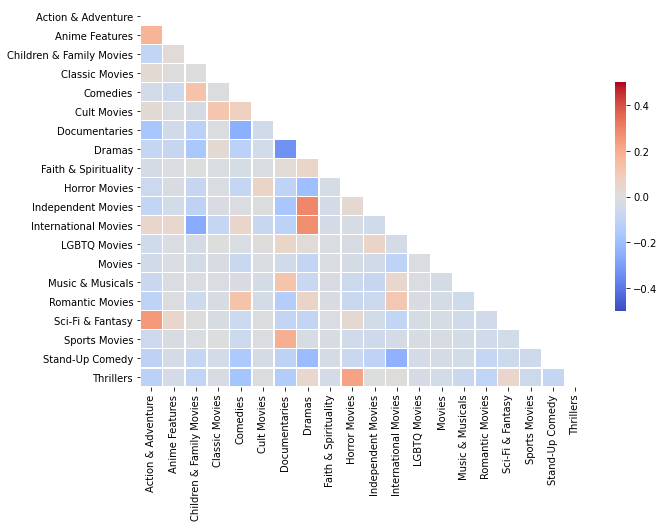

In [ ]:
#如何在csv文件中將一列拆分為單獨的列
genres_df = calculate_mlb(movie_df['genre'])

movie_corr = genres_df.corr()
movie_mask = np.zeros_like(movie_corr, dtype=np.bool)
movie_mask[np.triu_indices_from(movie_mask)] = True
fig, ax = plt.subplots(figsize=(10, 7))
pl = sns.heatmap(movie_corr, mask=movie_mask, cmap= "coolwarm", vmax=.5, vmin=-.5, center=0, linewidths=.5,
                 cbar_kws={"shrink": 0.6})
plt.show()

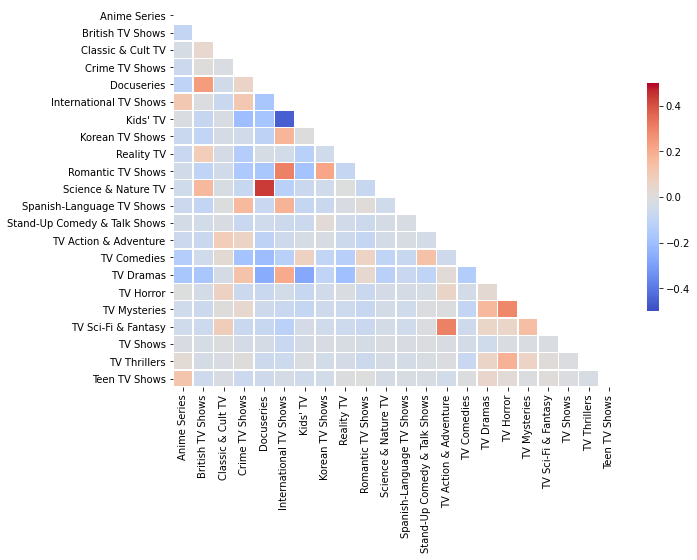

In [ ]:
genres_df = calculate_mlb(show_df['genre'])

show_corr = genres_df.corr()
show_mask = np.zeros_like(show_corr, dtype=np.bool)
show_mask[np.triu_indices_from(show_mask)] = True
fig, ax = plt.subplots(figsize=(10, 7))
pl = sns.heatmap(show_corr, mask=show_mask, cmap= "coolwarm", vmax=.5, vmin=-.5, center=0, linewidths=.5,
                 cbar_kws={"shrink": 0.6})
plt.show()

In [ ]:
#載入文字雲套件
!pip install wordcloud

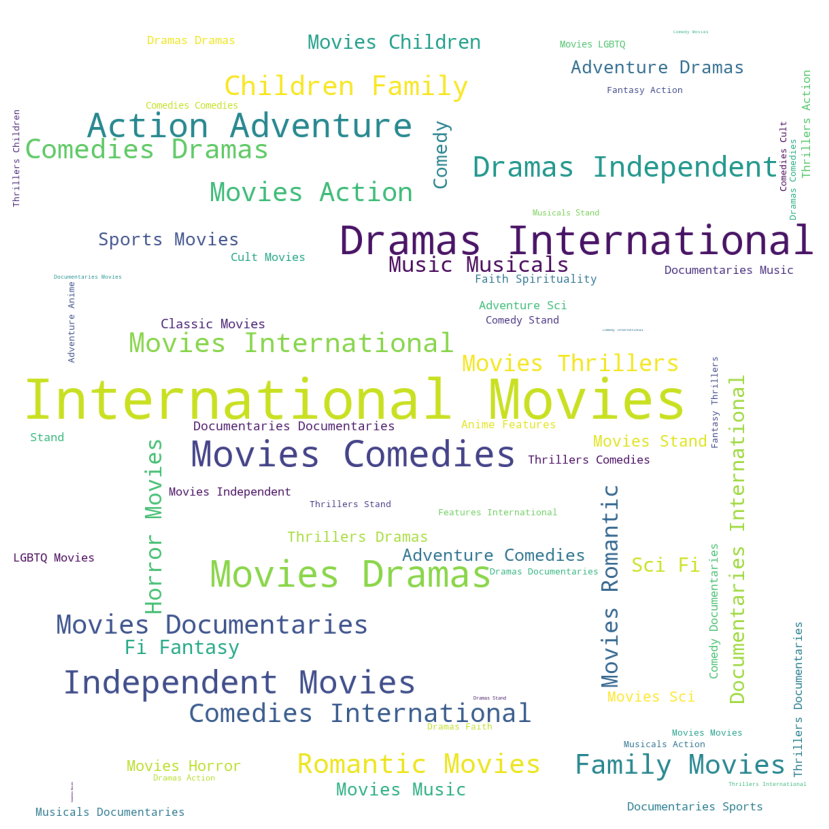

In [ ]:
#使用文字雲, 找出最多被使用在資料集上的描述
#對文本數據中出現頻率較高的“關鍵詞”在視覺上的突出呈現，形成關鍵詞的渲染形成類似雲一樣的彩色圖片，從而一眼就可以領略文本數據的主要表達意思
from wordcloud import WordCloud

text = str(list(movie_df['genre'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '')

plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### 分析TV SHOW系列持續時間

In [ ]:
fig = px.histogram(x=show_df['duration'])
fig.update_xaxes(categoryorder="total descending")
fig.update_layout(
    title="Distribution of shows duration",
    xaxis_title="Duration of the Show",
)
fig.show()